1) Você trabalha em uma imobiliária e recebeu um conjunto de dados
contendo informações sobre imóveis, incluindo a área (em metros
quadrados) e a distância até a praia (em metros). Seu objetivo é
utilizar o algoritmo DBSCAN para identificar grupos de imóveis com
características semelhantes e, em seguida, analisar o valor médio
dos imóveis em cada grupo.
Os dados ser]ao gerados utilizando arrays numpy , com as seguintes
colunas: "area", "distancia_praia" e "valor".

In [28]:
import pandas as pd

In [29]:
imoveis ={
'Area':[80,80,80,150,200,90,110,130,180,160],
'Valor':[300,450,550,600,350,420,550,780,360,575],
'Dist_praia':[15,15,8,25,12,15,22,8,5,14]
}
Label =['1o','2o','3o','4o','5o','6o','7o','8o','9o','10o']
imoveis_df=pd.DataFrame(imoveis, index= Label)
imoveis_df.head()

,Area,Valor,Dist_praia
1o,80,300,15
2o,80,450,15
3o,80,550,8
4o,150,600,25
5o,200,350,12


In [41]:
import matplotlib.pyplot as plt

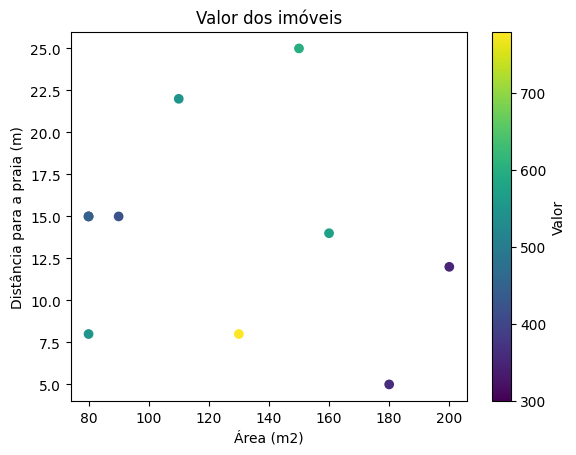

In [42]:
# Criar o gráfico de dispersão
plt.scatter(imoveis_df['Area'], imoveis_df['Dist_praia'], c=imoveis_df['Valor'])
plt.xlabel('Área (m2)')
plt.ylabel('Distância para a praia (m)')
plt.title('Valor dos imóveis')
plt.colorbar(label='Valor')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler


cluster
0    493.5
Name: Valor, dtype: float64
Número de clusters encontrados: 1


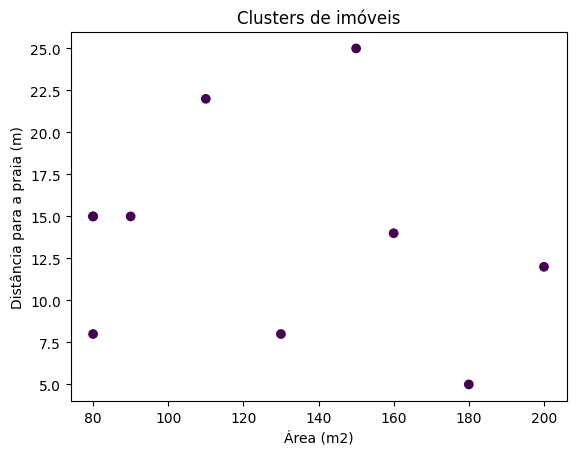

In [33]:
# Escalar as variáveis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imoveis_df[['Area', 'Dist_praia']])
from sklearn.cluster import DBSCAN
# Executar o algoritmo DBSCAN
dbscan = DBSCAN(eps=30, min_samples=2)
dbscan.fit(scaled_data)
# Obter os rótulos dos clusters
labels = dbscan.labels_
# Adicionar os rótulos dos clusters ao DataFrame
imoveis_df['cluster'] = labels
# Calcular o valor médio dos imóveis em cada cluster
mean_values =imoveis_df.groupby('cluster')['Valor'].mean()
# Exibir os valores médios dos imóveis em cada cluster
print(mean_values)
# Número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")
# Gráfico de dispersão com os clusters
plt.scatter(imoveis_df['Area'], imoveis_df['Dist_praia'], c=imoveis_df['cluster'])
plt.xlabel('Área (m2)')
plt.ylabel('Distância para a praia (m)')
plt.title('Clusters de imóveis')
plt.show()

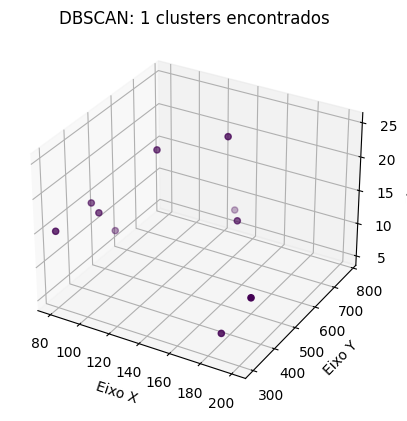

In [34]:
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(imoveis_df['Area'], imoveis_df['Valor'], imoveis_df['Dist_praia'],
c=imoveis_df['cluster'])

ax.set_title('DBSCAN: %d clusters encontrados' % n_clusters)
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')
plt.show()

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [36]:
# Gerar dados simulados
np.random.seed(0)
n_samples = 1000
tempo = np.random.uniform(low=0, high=10, size=n_samples)
temperatura = np.random.normal(loc=25, scale=5, size=n_samples)
vibracao = np.random.normal(loc=0, scale=2, size=n_samples)
corrente = np.random.normal(loc=10, scale=2, size=n_samples)
# Criar o array NumPy com os dados
dados_maquina = np.column_stack((tempo, temperatura, vibracao, corrente));
# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(dados_maquina[:, 1:]) # Excluindo a coluna de tempo

# Obter os rótulos dos clusters
labels = dbscan.labels_

# Exibir os resultados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

Número de clusters encontrados: 8


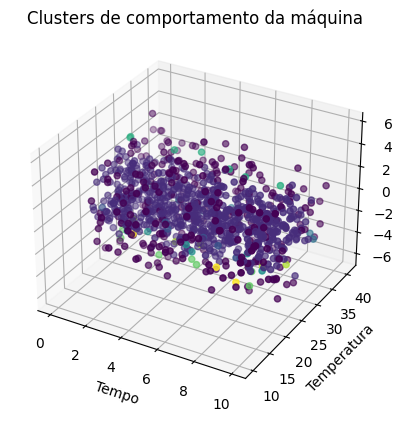

In [37]:
# Gráfico 3D dos clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tempo, temperatura, vibracao, c=labels)
ax.set_xlabel('Tempo')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Vibração')
plt.title('Clusters de comportamento da máquina')
plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [39]:
# Gerar dados simulados
np.random.seed(0)
n_samples = 1000
tempo = np.random.uniform(low=0, high=10, size=n_samples)
temperatura = np.random.normal(loc=25, scale=5, size=n_samples)
vibracao = np.random.normal(loc=0, scale=2, size=n_samples)
corrente = np.random.normal(loc=10, scale=2, size=n_samples)

Número de anomalias detectadas: 50


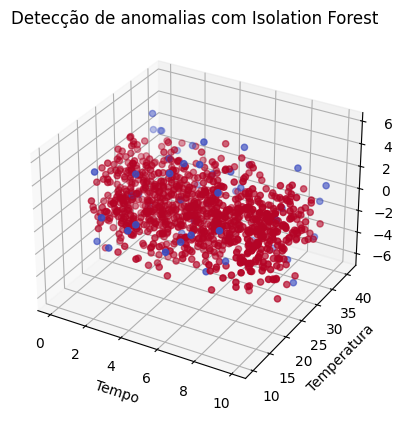

In [40]:
# Criar o array NumPy com os dados
dados_maquina = np.column_stack((tempo, temperatura, vibracao,
corrente))
# Aplicar o algoritmo Isolation Forest
isolation_forest = IsolationForest(contamination=0.05,
random_state=0)
isolation_forest.fit(dados_maquina[:, 1:]) # Excluindo a coluna de
tempo
# Obter os rótulos de anomalia (-1 para anomalias, 1 para dados normais)
labels = isolation_forest.predict(dados_maquina[:, 1:])
# Exibir os resultados
n_anomalias = np.sum(labels == -1)
print(f"Número de anomalias detectadas: {n_anomalias}")
# Gráfico 3D com anomalias destacadas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tempo, temperatura, vibracao, c=labels, cmap='coolwarm')
ax.set_xlabel('Tempo')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Vibração')
plt.title('Detecção de anomalias com Isolation Forest')
plt.show()